In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
data_train_path='/Users/abj/Desktop/dwdm project/skincancer/train'
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True,image_size=(180,180),batch_size=32,validation_split=False)
data_cat=data_train.class_names
print(data_cat)

Found 299 files belonging to 2 classes.
['benign', 'malignant']


In [19]:
data_val_path='/Users/abj/Desktop/dwdm project/skincancer/validation'
data_test_path='/Users/abj/Desktop/dwdm project/skincancer/test'

In [20]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,shuffle=True,image_size=(180,180),batch_size=32,validation_split=False)
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,shuffle=True,image_size=(180,180),batch_size=32,validation_split=False)

Found 174 files belonging to 2 classes.
Found 42 files belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [23]:
model.fit(data_train,validation_data=data_val,epochs=25,batch_size=32,verbose=1)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5641 - loss: 1.5997 - val_accuracy: 0.7989 - val_loss: 0.4731
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7139 - loss: 0.5049 - val_accuracy: 0.7356 - val_loss: 0.4850
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7502 - loss: 0.5271 - val_accuracy: 0.7931 - val_loss: 0.4002
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7604 - loss: 0.4159 - val_accuracy: 0.8793 - val_loss: 0.3265
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8797 - loss: 0.2893 - val_accuracy: 0.7414 - val_loss: 0.4904
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8501 - loss: 0.2975 - val_accuracy: 0.9253 - val_loss: 0.2667
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8991 - loss: 0.1940 - val_accuracy: 0.9080 - val_loss: 0.2583
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9613 - loss: 0.1249 - val_accuracy: 0.9023 - val_loss:

In [24]:
test_loss, test_acc = model.evaluate(data_test, steps=len(data_test))
print('Test accuracy:', test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9211 - loss: 0.6642
Test accuracy: 0.9285714030265808


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


2024-04-07 01:16:28.384708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


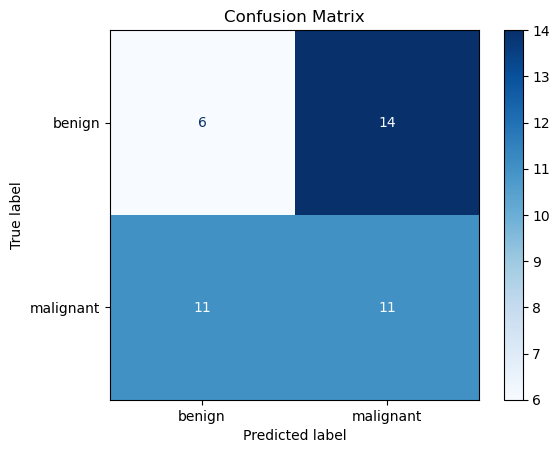

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(data_test)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the test dataset
true_classes = np.concatenate([y for x, y in data_test], axis=0)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Define class labels
class_labels = data_cat

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.metrics import classification_report

# Get the true labels
y_true = []
for images, labels in data_test:
    y_true.extend(labels.numpy())

# Get the predicted labels
y_pred_prob = model.predict(data_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate classification report
target_names = data_cat
report = classification_report(y_true, y_pred, target_names=target_names)

print(report)

2024-04-07 01:14:38.517072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
              precision    recall  f1-score   support

      benign       0.47      0.40      0.43        20
   malignant       0.52      0.59      0.55        22

    accuracy                           0.50        42
   macro avg       0.50      0.50      0.49        42
weighted avg       0.50      0.50      0.50        42



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


2024-04-07 01:06:10.483667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


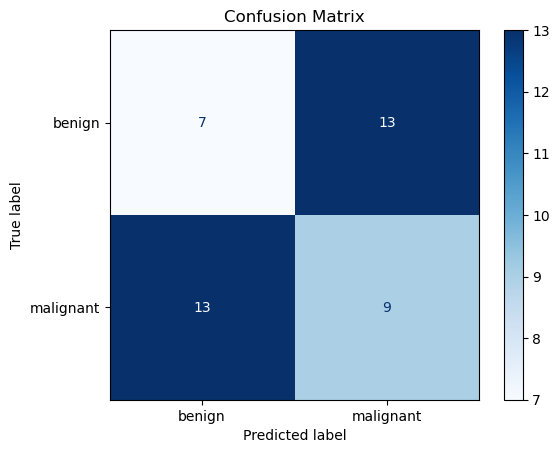

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(data_test)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the test dataset
true_classes = np.concatenate([y for x, y in data_test], axis=0)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Define class labels
class_labels = data_cat

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()